In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [173]:
#Choose a dataset with at least 20,000 observations
df = pd.read_csv('train_2v.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Cleaning
### duplication removal, typo errors removal, data type correction

In [174]:
#Perform initial exploration to understand the data structure, types of variables, and identify errors or missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# 1.	Data Cleaning and Preprocessing (4 marks)

#	Identification and Handling of Missing Values (1 mark):
### 0.5 marks: Correctly identifying missing values.


In [175]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [176]:
# Identifying and handling missing values.
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

### 0.5 marks: Appropriately handling missing values (e.g., imputation, removal).


In [177]:
# Duplication Removal
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [178]:
# If we used the median to replace the missing values we can notice the
# distribution
"""df['bmi'].fillna(df['bmi'].median(), inplace= True)"""

"df['bmi'].fillna(df['bmi'].median(), inplace= True)"

In [179]:
# Checking the 'bmi' distributions
"""sns.histplot(df['bmi'])"""

"sns.histplot(df['bmi'])"

In [180]:
df['bmi'] = df.groupby('age')['bmi'].transform(lambda x: x.fillna(x.mean()))

<Axes: xlabel='bmi', ylabel='Count'>

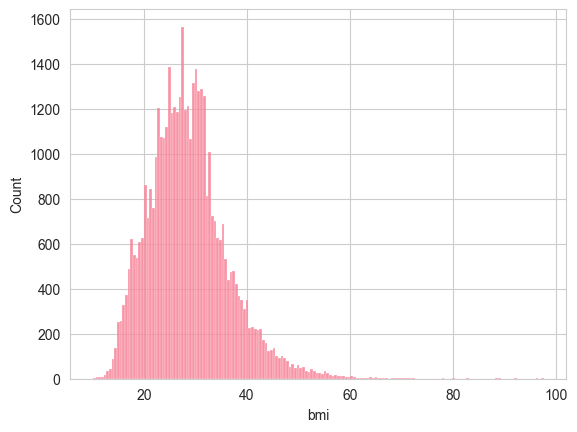

In [181]:
# Checking the 'bmi' distributions
sns.histplot(df['bmi'])

Smoking is a known risk factor for stroke. Since smoking is a konow factor I will exclude patients with unknow status from this analysis as it could be confounding factor in the analysis. The number of missing value for this parameter is high wich is a concern for the analysis. BMI is another know known risk factor so the ammount of missing value is alose a concern.

In [182]:
# Removing records where smoking status is null value
df.dropna(subset=['smoking_status'], inplace=True)

## Checking children

In [183]:
df[(df['work_type']== 'children') & (df['stroke']== 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


# Error Correction and Inconsistencies (1 mark):
### 0.5 marks: Identifying errors or inconsistencies in the data.
###0.5 marks: Correcting these errors effectively.


In [184]:
df.reset_index(drop=True, inplace = True)


In [185]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30103,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
30104,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
30105,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
30106,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [186]:
#0.5 marks: Identifying errors or inconsistencies in the data (Typo errors)
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [187]:
df['gender'].value_counts()

gender
Female    18366
Male      11733
Other         9
Name: count, dtype: int64

In [188]:
# Only a few observation were labelled as others and due to there was no information on these patients,
# they were excluded for the reamining of the analysis.
df = df[df['gender'].isin(['Female', 'Male'])]

In [189]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [190]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [191]:
df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [192]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

checking each feature we realized that there is not typo error in the categorical columns

COnverting the binary columns in categorical columns

In [193]:
# Update the 'hypertension' column
df['hypertension'] = df['hypertension'].apply(lambda x: 'no hypertension' if x == 0 else 'hypertension')

# Update the 'heart_disease' column
df['heart_disease'] = df['heart_disease'].apply(lambda x: 'no heart disease' if x == 0 else 'heart disease')

# Update the 'stroke' column
df['stroke'] = df['stroke'].apply(lambda x: 'no stroke' if x == 0 else 'stroke')

C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\118239472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hypertension'] = df['hypertension'].apply(lambda x: 'no hypertension' if x == 0 else 'hypertension')
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\118239472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heart_disease'] = df['heart_disease'].apply(lambda x: 'no heart disease' if x == 0 else 'heart disease')
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\118239472.py:8: SettingWithCop

## Outliers Detection and Handling (1 mark):
### 0.5 marks: Properly detecting outliers.
###0.5 marks: Appropriately handling outliers.


In [194]:
q10, q25, q50, q75= df['age'].quantile([0.10, 0.25, 0.50, 0.75]).values
Iqr=q75-q25
lf=int(q25-1.5*Iqr)
uf=int(q75+1.5*Iqr)
type(uf)

int

In [195]:
range_outlier_age = tuple([lf, uf])
range_outlier_age

(-10, 105)

In [196]:
df['age'].describe()

count    30099.000000
mean        47.940197
std         18.750826
min         10.000000
25%         33.000000
50%         48.000000
75%         62.000000
max         82.000000
Name: age, dtype: float64

We can see that there is no ouliers (-10, 105) due the lower frame is -10 and the min value is 10 and the upper frame is 105 and the max value is 82

In [197]:
out_age = df['age'][uf<df['age']]
out_age

Series([], Name: age, dtype: float64)

In [198]:
q10, q25, q50, q75= df['avg_glucose_level'].quantile([0.10, 0.25, 0.50, 0.75]).values
Iqr=q75-q25
lf=int(q25-2.0*Iqr)
uf=int(q75+2.0*Iqr)

In [199]:
range_outlier_glucosa = tuple([lf, uf])
range_outlier_glucosa

(4, 187)

In [200]:
out_glu = df['avg_glucose_level'][uf<df['avg_glucose_level']]
out_glu

3        243.53
5        205.84
17       198.21
22       206.72
23       214.45
          ...  
30094    214.05
30096    200.92
30099    228.43
30100    229.85
30104    213.61
Name: avg_glucose_level, Length: 3390, dtype: float64

in the avg_glucosa there is ouliers but we wont remove bc high level of glucose is consider as risk factor to develop a stroke

In [201]:
q10, q25, q50, q75= df['bmi'].quantile([0.10, 0.25, 0.50, 0.75]).values
Iqr=q75-q25
lf=int(q25-2.0*Iqr)
uf=int(q75+2.0*Iqr)


In [202]:
range_outlier_bmi = tuple([lf, uf])
range_outlier_bmi

(8, 50)

In [203]:
out_bmi = df['bmi'][uf<df['bmi']].sort_values(ascending=False)
out_bmi

2789     92.0
29900    89.0
24140    82.7
21277    80.1
499      78.0
         ... 
1873     50.1
6723     50.1
29074    50.1
21696    50.1
4177     50.1
Name: bmi, Length: 449, dtype: float64

High body index mass is also consider a risk factor to develop a stroke and is associated with high leves of glucose

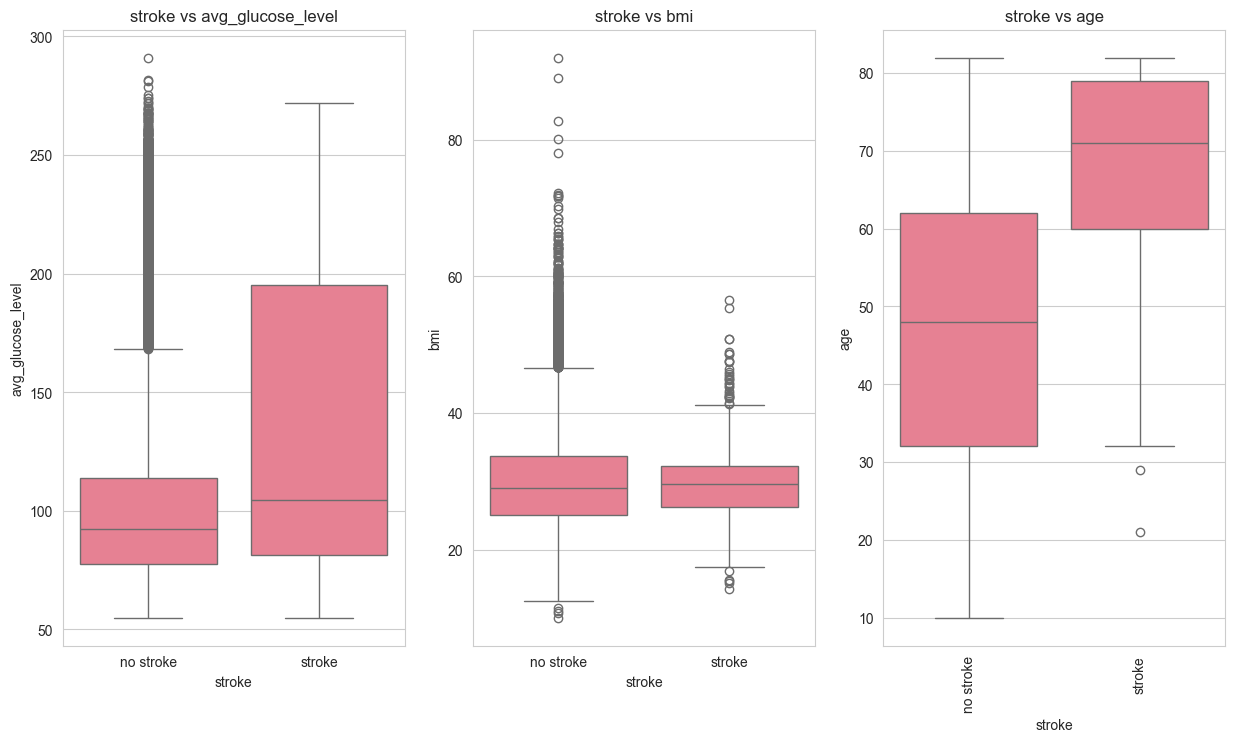

In [204]:
# Remove or impute outliers if necessary categorical.
numerical= ['avg_glucose_level', 'bmi', 'age']

plt.figure(figsize=(15,8))
for i, j in enumerate(numerical):
    plt.subplot(1,3, i+1)
    sns.boxplot(x =df['stroke'],y = df[j] )
    plt.title(f'stroke vs {j}')

plt.xticks(rotation=90)

plt.show()

# Data Types and Formatting (1 mark):
### 0.5 marks: Ensuring correct data types.
### 0.5 marks: Consistent formatting throughout the dataset.


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30099 entries, 0 to 30107
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30099 non-null  int64  
 1   gender             30099 non-null  object 
 2   age                30099 non-null  float64
 3   hypertension       30099 non-null  object 
 4   heart_disease      30099 non-null  object 
 5   ever_married       30099 non-null  object 
 6   work_type          30099 non-null  object 
 7   Residence_type     30099 non-null  object 
 8   avg_glucose_level  30099 non-null  float64
 9   bmi                30099 non-null  float64
 10  smoking_status     30099 non-null  object 
 11  stroke             30099 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 3.0+ MB


In [206]:
string_columns =['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for i in string_columns:
  df[i] = df[i].astype('string')

C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\3669685734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype('string')


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30099 entries, 0 to 30107
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30099 non-null  int64  
 1   gender             30099 non-null  string 
 2   age                30099 non-null  float64
 3   hypertension       30099 non-null  string 
 4   heart_disease      30099 non-null  string 
 5   ever_married       30099 non-null  string 
 6   work_type          30099 non-null  string 
 7   Residence_type     30099 non-null  string 
 8   avg_glucose_level  30099 non-null  float64
 9   bmi                30099 non-null  float64
 10  smoking_status     30099 non-null  string 
 11  stroke             30099 non-null  string 
dtypes: float64(3), int64(1), string(8)
memory usage: 3.0 MB


In [208]:
string_columns =['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for i in string_columns:
  df[i] = df[i].str.strip().str.lower()

C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2754718402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].str.strip().str.lower()


In [209]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30468,male,58.0,hypertension,no heart disease,yes,private,urban,87.96,39.2,never smoked,no stroke
1,56543,female,70.0,no hypertension,no heart disease,yes,private,rural,69.04,35.9,formerly smoked,no stroke
2,52800,female,52.0,no hypertension,no heart disease,yes,private,urban,77.59,17.7,formerly smoked,no stroke
3,41413,female,75.0,no hypertension,heart disease,yes,self-employed,rural,243.53,27.0,never smoked,no stroke
4,15266,female,32.0,no hypertension,no heart disease,yes,private,rural,77.67,32.3,smokes,no stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
30103,56196,female,10.0,no hypertension,no heart disease,no,children,urban,58.64,20.4,never smoked,no stroke
30104,5450,female,56.0,no hypertension,no heart disease,yes,govt_job,urban,213.61,55.4,formerly smoked,no stroke
30105,28375,female,82.0,hypertension,no heart disease,yes,private,urban,91.94,28.9,formerly smoked,no stroke
30106,27973,male,40.0,no hypertension,no heart disease,yes,private,urban,99.16,33.2,never smoked,no stroke


# 2.	Feature Engineering (4 marks)

•	Creation of New Features (2 marks):
### 1 mark: Creativity and relevance of new features.
### 1 mark: Effectiveness of new features in improving model performance


In [210]:
#Removing unless column
df.drop(['id'],inplace=True, axis=1)

C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\563396268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id'],inplace=True, axis=1)


In [211]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,58.0,hypertension,no heart disease,yes,private,urban,87.96,39.2,never smoked,no stroke
1,female,70.0,no hypertension,no heart disease,yes,private,rural,69.04,35.9,formerly smoked,no stroke
2,female,52.0,no hypertension,no heart disease,yes,private,urban,77.59,17.7,formerly smoked,no stroke
3,female,75.0,no hypertension,heart disease,yes,self-employed,rural,243.53,27.0,never smoked,no stroke
4,female,32.0,no hypertension,no heart disease,yes,private,rural,77.67,32.3,smokes,no stroke
...,...,...,...,...,...,...,...,...,...,...,...
30103,female,10.0,no hypertension,no heart disease,no,children,urban,58.64,20.4,never smoked,no stroke
30104,female,56.0,no hypertension,no heart disease,yes,govt_job,urban,213.61,55.4,formerly smoked,no stroke
30105,female,82.0,hypertension,no heart disease,yes,private,urban,91.94,28.9,formerly smoked,no stroke
30106,male,40.0,no hypertension,no heart disease,yes,private,urban,99.16,33.2,never smoked,no stroke


In [212]:
counts_df = len(df)

# Agrupando por 'gender' y 'stroke'
result_2 = df.groupby(['gender', 'stroke']).agg(
    n=('gender', 'size'),
    percentage=('gender', lambda x: (x.size / counts_df) * 100),
    age_mean=('age', 'mean'),
    age_sd=('age', 'std')
).reset_index()

result_2



,gender,stroke,n,percentage,age_mean,age_sd
0,female,no stroke,18006,59.822585,46.888926,18.577887
1,female,stroke,360,1.196053,68.594444,12.214288
2,male,no stroke,11455,38.057743,48.458402,18.666693
3,male,stroke,278,0.923619,67.931655,11.359517


As common with disease related data thre is a clear unbalance between disease and non disease patient wich is an issue for machine lerning methods. I will use a strategy of oversampling to deal with his issue.

In [213]:
#Checking the distribution of strokes and smoking status
counts_df = len(df)

# Agrupando por 'gender' y 'stroke'
result_2 = df.groupby(['smoking_status', 'stroke']).agg(
    n=('gender', 'size'),
    percentage=('gender', lambda x: (x.size / counts_df) * 100),

).reset_index()

result_2


,smoking_status,stroke,n,percentage
0,formerly smoked,no stroke,7266,24.140337
1,formerly smoked,stroke,221,0.734244
2,never smoked,no stroke,15767,52.383800
3,never smoked,stroke,284,0.943553
4,smokes,no stroke,6428,21.356191
5,smokes,stroke,133,0.441875


In [214]:
#Creating New Feature EverSmoked
df['ever_smoked'] = df['smoking_status'].apply(lambda x: 'Smoked' if x in ['smokes', 'formerly smoked'] else 'no smoked')

C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2804455750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_smoked'] = df['smoking_status'].apply(lambda x: 'Smoked' if x in ['smokes', 'formerly smoked'] else 'no smoked')


In [215]:
counts_df = len(df)

# Agrupando por 'gender' y 'stroke'
result_2 = df.groupby(['ever_smoked', 'stroke']).agg(
    n=('gender', 'size'),
    percentage=('gender', lambda x: (x.size / counts_df) * 100),

).reset_index()

result_2


,ever_smoked,stroke,n,percentage
0,Smoked,no stroke,13694,45.496528
1,Smoked,stroke,354,1.176119
2,no smoked,no stroke,15767,52.383800
3,no smoked,stroke,284,0.943553


## •	Encoding of Categorical Variables (1 mark):
#	0.5 marks: Correct method of encoding (e.g., one-hot, label encoding).
#	0.5 marks: Implementation without introducing multicollinearity.


In [216]:
df2 = df.copy()

In [217]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_smoked
0,male,58.0,hypertension,no heart disease,yes,private,urban,87.96,39.2,never smoked,no stroke,no smoked
1,female,70.0,no hypertension,no heart disease,yes,private,rural,69.04,35.9,formerly smoked,no stroke,Smoked
2,female,52.0,no hypertension,no heart disease,yes,private,urban,77.59,17.7,formerly smoked,no stroke,Smoked
3,female,75.0,no hypertension,heart disease,yes,self-employed,rural,243.53,27.0,never smoked,no stroke,no smoked
4,female,32.0,no hypertension,no heart disease,yes,private,rural,77.67,32.3,smokes,no stroke,Smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
30103,female,10.0,no hypertension,no heart disease,no,children,urban,58.64,20.4,never smoked,no stroke,no smoked
30104,female,56.0,no hypertension,no heart disease,yes,govt_job,urban,213.61,55.4,formerly smoked,no stroke,Smoked
30105,female,82.0,hypertension,no heart disease,yes,private,urban,91.94,28.9,formerly smoked,no stroke,Smoked
30106,male,40.0,no hypertension,no heart disease,yes,private,urban,99.16,33.2,never smoked,no stroke,no smoked


In [218]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_smoked
0,male,58.0,hypertension,no heart disease,yes,private,urban,87.96,39.2,never smoked,no stroke,no smoked
1,female,70.0,no hypertension,no heart disease,yes,private,rural,69.04,35.9,formerly smoked,no stroke,Smoked
2,female,52.0,no hypertension,no heart disease,yes,private,urban,77.59,17.7,formerly smoked,no stroke,Smoked
3,female,75.0,no hypertension,heart disease,yes,self-employed,rural,243.53,27.0,never smoked,no stroke,no smoked
4,female,32.0,no hypertension,no heart disease,yes,private,rural,77.67,32.3,smokes,no stroke,Smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
30103,female,10.0,no hypertension,no heart disease,no,children,urban,58.64,20.4,never smoked,no stroke,no smoked
30104,female,56.0,no hypertension,no heart disease,yes,govt_job,urban,213.61,55.4,formerly smoked,no stroke,Smoked
30105,female,82.0,hypertension,no heart disease,yes,private,urban,91.94,28.9,formerly smoked,no stroke,Smoked
30106,male,40.0,no hypertension,no heart disease,yes,private,urban,99.16,33.2,never smoked,no stroke,no smoked


In [219]:
"""df2.to_csv('train_2v-clean.csv', index = False)"""

"df2.to_csv('train_2v-clean.csv', index = False)"

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30099 entries, 0 to 30107
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             30099 non-null  string 
 1   age                30099 non-null  float64
 2   hypertension       30099 non-null  string 
 3   heart_disease      30099 non-null  string 
 4   ever_married       30099 non-null  string 
 5   work_type          30099 non-null  string 
 6   Residence_type     30099 non-null  string 
 7   avg_glucose_level  30099 non-null  float64
 8   bmi                30099 non-null  float64
 9   smoking_status     30099 non-null  string 
 10  stroke             30099 non-null  string 
 11  ever_smoked        30099 non-null  object 
dtypes: float64(3), object(1), string(8)
memory usage: 3.0+ MB


In [221]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the training data
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'ever_smoked', 'stroke']
for i in columns:
  df[i + '_encoded'] = le.fit_transform(df[i])




C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\3848359341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i + '_encoded'] = le.fit_transform(df[i])
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\3848359341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i + '_encoded'] = le.fit_transform(df[i])
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\3848359341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [222]:
#Dropping this columns 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'ever_smoked', 'stroke'
for i in columns:
  df.drop([i], axis = 1, inplace =True)

C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2140250471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([i], axis = 1, inplace =True)
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2140250471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([i], axis = 1, inplace =True)
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2140250471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([i], axis = 1, inplace

In [223]:
df

,age,avg_glucose_level,bmi,gender_encoded,hypertension_encoded,heart_disease_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,ever_smoked_encoded,stroke_encoded
0,58.0,87.96,39.2,1,0,1,1,3,1,1,1,0
1,70.0,69.04,35.9,0,1,1,1,3,0,0,0,0
2,52.0,77.59,17.7,0,1,1,1,3,1,0,0,0
3,75.0,243.53,27.0,0,1,0,1,4,0,1,1,0
4,32.0,77.67,32.3,0,1,1,1,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30103,10.0,58.64,20.4,0,1,1,0,0,1,1,1,0
30104,56.0,213.61,55.4,0,1,1,1,1,1,0,0,0
30105,82.0,91.94,28.9,0,0,1,1,3,1,0,0,0
30106,40.0,99.16,33.2,1,1,1,1,3,1,1,1,0


<Axes: >

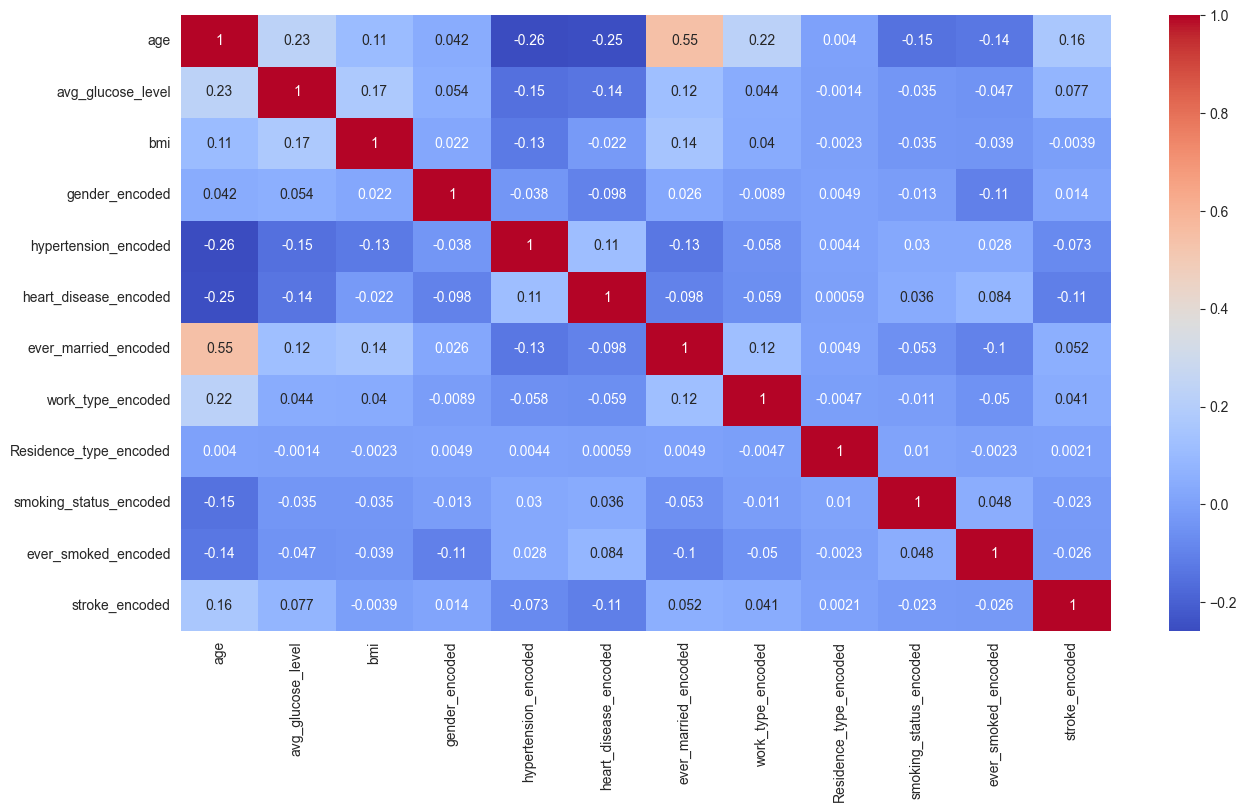

In [224]:
#due that the dataset is unbalanced the correlaion is not visible
plt.figure(figsize= (15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')



#Scaling of Numerical Features (1 mark):
###0.5 marks: Correct application of standard scaling.
### 0.5 marks: Consistency in scaling across the dataset.





El problema de obtener filas con valores NaN cuando concatenas dos DataFrames generalmente ocurre debido a una desalineación de los índices entre los DataFrames que estás combinando. Al concatenar DataFrames, Pandas alinea los datos por índice de forma predeterminada. Si los índices no coinciden, se generan filas con valores NaN.

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols =['age','avg_glucose_level','bmi']

# Fit and transform the training data
df_scaled = scaler.fit_transform(df[numeric_cols])
df_scaled_2 = pd.DataFrame(df_scaled, columns=numeric_cols)


#Consistency in scaling across the dataset we reset index to assure that the number of rows is equal in both dataset
df_scaled_2.reset_index(drop =True, inplace = True)

df_scaled_final = pd.concat([df.drop(['age','avg_glucose_level','bmi'], axis=1), df_scaled_2], axis=1)
df_scaled_final

,gender_encoded,hypertension_encoded,heart_disease_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,ever_smoked_encoded,stroke_encoded,age,avg_glucose_level,bmi
0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.536508,-0.418424,1.291475
1,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.176491,-0.830025,0.825104
2,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.216517,-0.644022,-1.747005
3,0.0,1.0,0.0,1.0,4.0,0.0,1.0,1.0,0.0,1.443150,2.965970,-0.432685
4,0.0,1.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0,-0.850121,-0.642281,0.316335
...,...,...,...,...,...,...,...,...,...,...,...,...
14657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.970090,-0.616611,-1.351296
14755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.589840,-0.475204,-1.111044
16884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.330107,-0.409723,1.333873
18189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.436771,-0.561789,-0.955587


In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols =['age','avg_glucose_level','bmi']

# Fit and transform the training data
df_scaled = scaler.fit_transform(df[numeric_cols])
df_scaled_2 = pd.DataFrame(df_scaled, columns=numeric_cols)


#Consistency in scaling across the dataset we reset index to assure that the number of rows is equal in both dataframe
df_scaled_2.reset_index(drop =True, inplace = True)

df_scaled_final = pd.concat([df.drop(['age','avg_glucose_level','bmi'], axis=1).reset_index(drop =True), df_scaled_2], axis=1)
df_scaled_final

,gender_encoded,hypertension_encoded,heart_disease_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,ever_smoked_encoded,stroke_encoded,age,avg_glucose_level,bmi
0,1,0,1,1,3,1,1,1,0,0.536508,-0.418424,1.291475
1,0,1,1,1,3,0,0,0,0,1.176491,-0.830025,0.825104
2,0,1,1,1,3,1,0,0,0,0.216517,-0.644022,-1.747005
3,0,1,0,1,4,0,1,1,0,1.443150,2.965970,-0.432685
4,0,1,1,1,3,0,2,0,0,-0.850121,-0.642281,0.316335
...,...,...,...,...,...,...,...,...,...,...,...,...
30094,0,1,1,0,0,1,1,1,0,-2.023422,-1.056275,-1.365428
30095,0,1,1,1,1,1,0,0,0,0.429844,2.315066,3.580935
30096,0,0,1,1,3,1,0,0,0,1.816473,-0.331840,-0.164169
30097,1,1,1,1,3,1,1,1,0,-0.423466,-0.174771,0.443527


# 3.	Data Splitting (2 marks)
##Appropriate Splitting Ratio (1 mark):
###0.5 marks: Using the correct split ratio (80/20 or 70/30).
### 0.5 marks: Correct usage of random state (0 or 42).
## Data Integrity Post-Split (1 mark):
### 1 mark: Ensuring that the split data retains integrity and is suitable for modeling.


Why Use Stratified Sampling?
Stratified sampling is important in scenarios where the classes in your dataset are imbalanced because:

It ensures that the distribution of classes in your training and testing datasets reflects the original dataset.
It helps in training models that generalize well to unseen data, especially when there are minority classes that might be underrepresented in the data.
By implementing stratified sampling, you improve the reliability of your model evaluations and avoid issues related to biased performance metrics that can arise from imbalanced class distributions.

Ensuring that the split data retains integrity and is suitable for modeling.

In [227]:
df.head()

,age,avg_glucose_level,bmi,gender_encoded,hypertension_encoded,heart_disease_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,ever_smoked_encoded,stroke_encoded
0,58.0,87.96,39.2,1,0,1,1,3,1,1,1,0
1,70.0,69.04,35.9,0,1,1,1,3,0,0,0,0
2,52.0,77.59,17.7,0,1,1,1,3,1,0,0,0
3,75.0,243.53,27.0,0,1,0,1,4,0,1,1,0
4,32.0,77.67,32.3,0,1,1,1,3,0,2,0,0


In [228]:
X = df_scaled_final.drop('stroke_encoded', axis=1)
y = df_scaled_final['stroke_encoded']

In [229]:
#train_test_split is used with the stratify=y parameter, which ensures that the class proportions in y are preserved in the train and test sets.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, stratify=y,random_state=42)

In [230]:
X_train.shape ,X_test.shape,y_train.shape,y_test.shape

((21069, 11), (9030, 11), (21069,), (9030,))

#4.	Data Visualization in Python (3 marks)
## Clarity and Informative Value (1.5 marks):
### 0.5 marks: Clarity of visualizations.
### 0.5 marks: Informative value and insightfulness.
### 0.5 marks: Proper labeling and usage of legends.
##Variety of Visualizations (1.5 marks):
### 0.5 marks: Use of multiple types of visualizations (e.g., heatmaps, histograms).
### 0.5 marks: Appropriateness of visualizations for the data.
### 0.5 marks: Aesthetic appeal and readability.


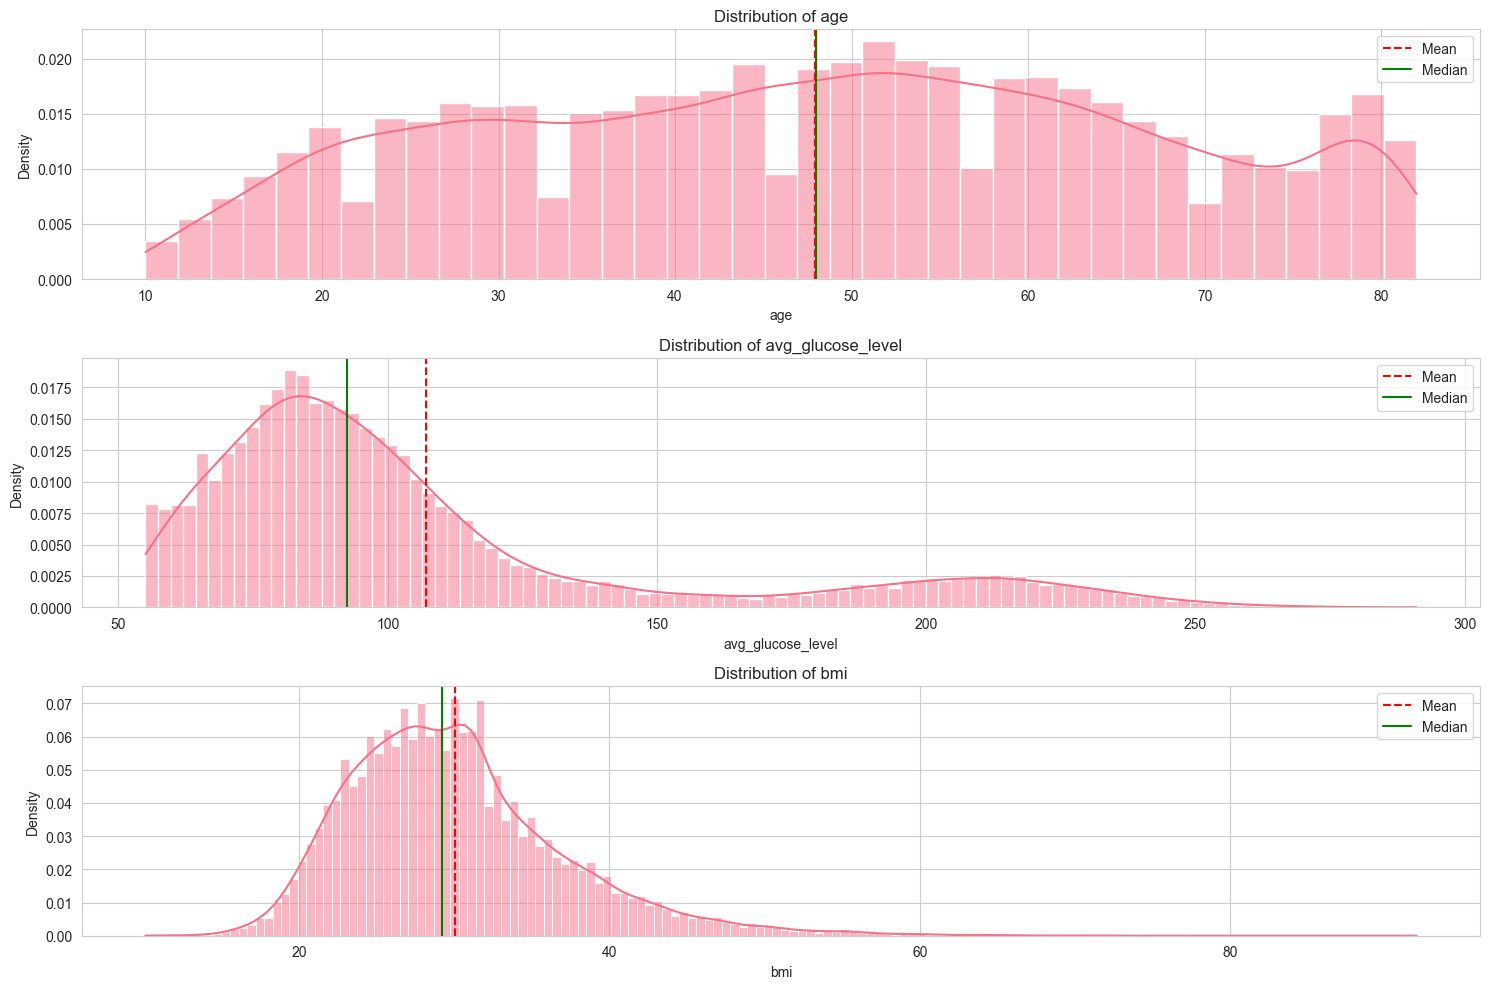

In [231]:

# Set the style of the plot to whitegrid
sns.set_style("whitegrid")

# Set the color palette to "husl"
sns.set_palette("husl")

# Create a new figure with a specified figure size
plt.figure(figsize=(15, 10))

# Define the list of continuous columns
continous_data = ["age", "avg_glucose_level", "bmi"]

# Iterate through each continuous column
for i, column in enumerate(continous_data, 1):
    # Create a subplot for the current continuous column
    plt.subplot(len(continous_data), 1, i)

    # Create a histogram plot for the current continuous column with kernel density estimation (kde) and density statistics (stat="density")
    sns.histplot(df2[column], kde=True, stat="density")

    # Add vertical lines for the mean and median of the data
    plt.axvline(df2[column].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df2[column].median(), color='g', linestyle='-', label='Median')

    # Add a legend to the plot
    plt.legend()

    # Set the title, x-axis label, and y-axis label for the plot
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")

    # Adjust the layout of subplots
    plt.tight_layout()

# Define the path to save the PDF file
#pdf_path_continuous = "continuous_variables2.pdf"

# Save the plot as a PDF file
#plt.savefig(pdf_path_continuous)

# Display the plot
plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2734821495.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df2, palette=colors)
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2734821495.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x=column, data=df2, palette=colors)
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2734821495.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df2, palette=colors)
C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\2734821495.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.co

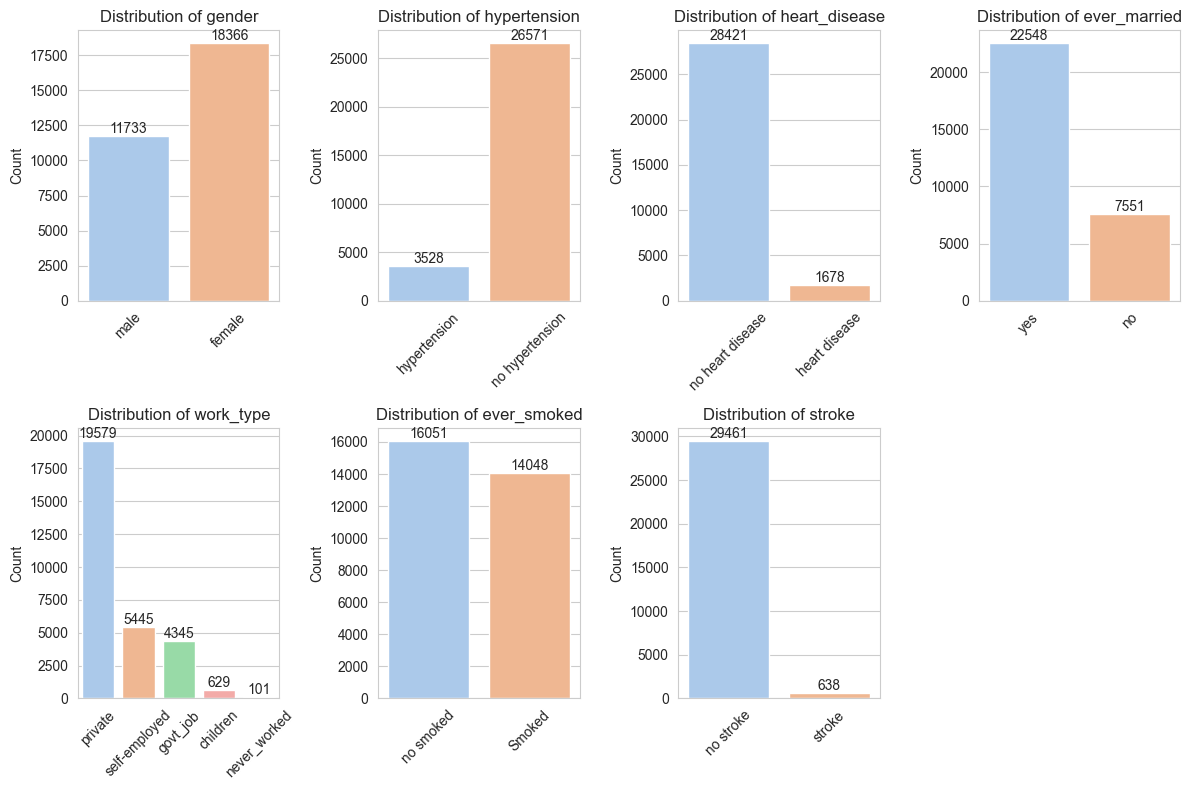

In [232]:


sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
plt.figure(figsize=(12, 8))
categorical_data = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "ever_smoked", "stroke"]

for i, column in enumerate(categorical_data):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(x=column, data=df2, palette=colors)

    plt.title(f"Distribution of {column}")
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add count values on top of each bar
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()


# Display the plot
plt.show()


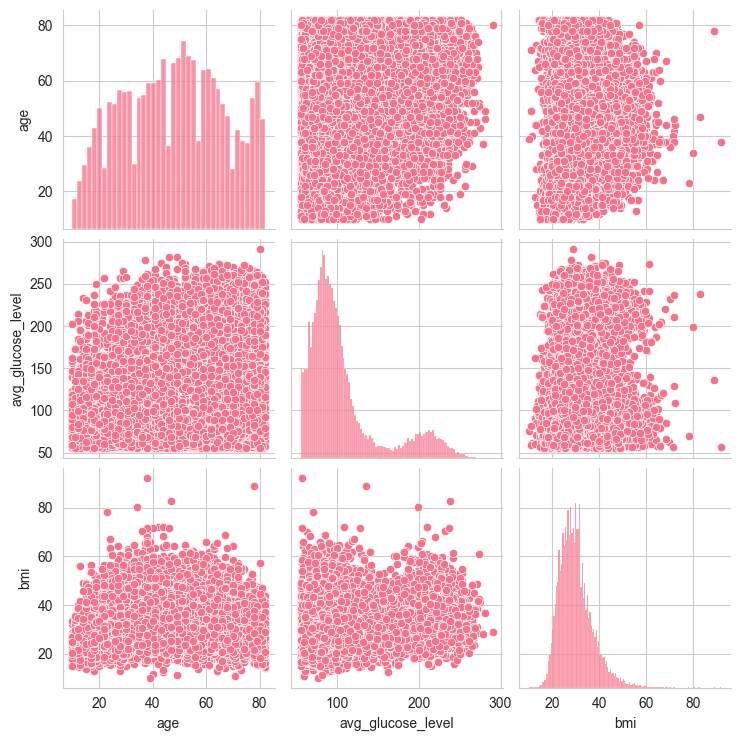

In [233]:

sns.pairplot(data=df2)

In [234]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_smoked
0,male,58.0,hypertension,no heart disease,yes,private,urban,87.96,39.2,never smoked,no stroke,no smoked
1,female,70.0,no hypertension,no heart disease,yes,private,rural,69.04,35.9,formerly smoked,no stroke,Smoked
2,female,52.0,no hypertension,no heart disease,yes,private,urban,77.59,17.7,formerly smoked,no stroke,Smoked
3,female,75.0,no hypertension,heart disease,yes,self-employed,rural,243.53,27.0,never smoked,no stroke,no smoked
4,female,32.0,no hypertension,no heart disease,yes,private,rural,77.67,32.3,smokes,no stroke,Smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
30103,female,10.0,no hypertension,no heart disease,no,children,urban,58.64,20.4,never smoked,no stroke,no smoked
30104,female,56.0,no hypertension,no heart disease,yes,govt_job,urban,213.61,55.4,formerly smoked,no stroke,Smoked
30105,female,82.0,hypertension,no heart disease,yes,private,urban,91.94,28.9,formerly smoked,no stroke,Smoked
30106,male,40.0,no hypertension,no heart disease,yes,private,urban,99.16,33.2,never smoked,no stroke,no smoked


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


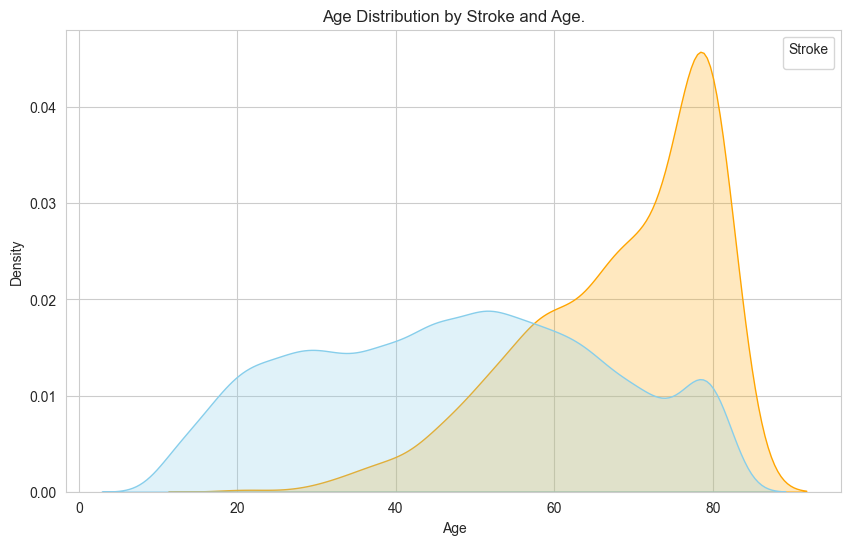

In [235]:
df_age_stroke = df2[['stroke', 'age']]

# Create a density plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.kdeplot(data=df_age_stroke, x='age', hue='stroke', fill=True, palette={'no stroke': 'skyblue', 'stroke': 'orange'}, common_norm=False)
# Plot the density of 'age' with different colors for 'stroke' categories, fill the area under the curves

# Use skyblue color for 'no stroke' and orange color for 'stroke'
plt.title('Age Distribution by Stroke and Age.')  # Set the title of the plot
plt.xlabel('Age')  # Set the label for the x-axis
plt.ylabel('Density')  # Set the label for the y-axis

plt.legend(title='Stroke')  # Add a legend with the title 'Stroke'
 # Display the plot

plt.show()

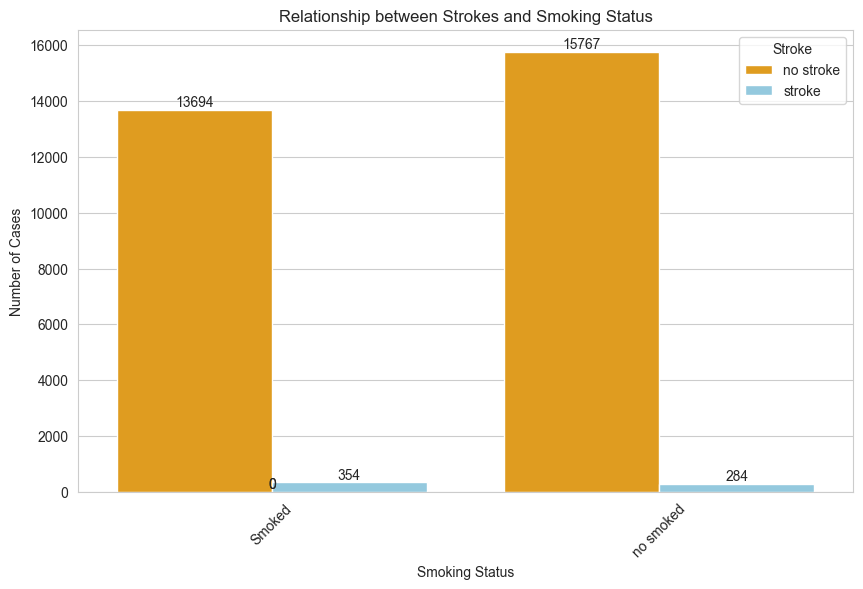

In [236]:
# Get the counts of strokes and smoking status from the oversampled DataFrame

# Sort the data by smoking status and the presence of strokes
#stroke_smoking_counts = stroke_smoking_counts.sort_values(by=['ever_smoked', 'stroke'])

stroke_smoking_counts = df2.groupby(['ever_smoked'])['stroke'].value_counts().reset_index()

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ever_smoked', y='count', hue='stroke', data=stroke_smoking_counts, palette={'stroke': 'skyblue', 'no stroke': 'orange'})
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
            ha='center', va='bottom', fontsize=10)

plt.title('Relationship between Strokes and Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_8236\73714751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='avg_glucose_level', data=df_avg_glucose_stroke, palette={'no stroke': 'skyblue', 'stroke': 'orange'})


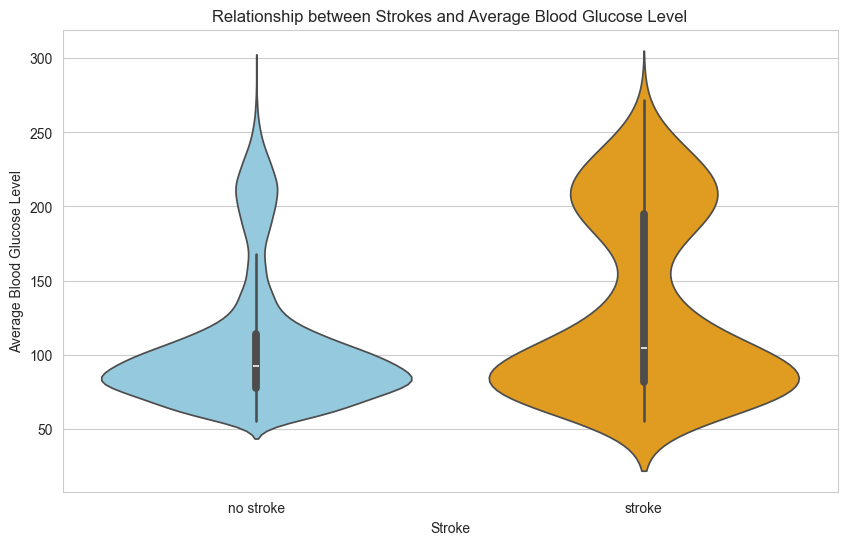

In [237]:

df_avg_glucose_stroke = df2[['stroke', 'avg_glucose_level']].reset_index()

# Create the violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='avg_glucose_level', data=df_avg_glucose_stroke, palette={'no stroke': 'skyblue', 'stroke': 'orange'})
plt.title('Relationship between Strokes and Average Blood Glucose Level')
plt.xlabel('Stroke')
plt.ylabel('Average Blood Glucose Level')
plt.savefig("Relationship between Strokes and Average Blood Glucose Level", dpi=300)
plt.show()


we can see that is umbalanced

In [238]:
df_scaled_final.groupby('stroke_encoded').count().reset_index()

,stroke_encoded,gender_encoded,hypertension_encoded,heart_disease_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,ever_smoked_encoded,age,avg_glucose_level,bmi
0,0,29461,29461,29461,29461,29461,29461,29461,29461,29461,29461,29461
1,1,638,638,638,638,638,638,638,638,638,638,638


In [239]:
df_scaled_final

,gender_encoded,hypertension_encoded,heart_disease_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,ever_smoked_encoded,stroke_encoded,age,avg_glucose_level,bmi
0,1,0,1,1,3,1,1,1,0,0.536508,-0.418424,1.291475
1,0,1,1,1,3,0,0,0,0,1.176491,-0.830025,0.825104
2,0,1,1,1,3,1,0,0,0,0.216517,-0.644022,-1.747005
3,0,1,0,1,4,0,1,1,0,1.443150,2.965970,-0.432685
4,0,1,1,1,3,0,2,0,0,-0.850121,-0.642281,0.316335
...,...,...,...,...,...,...,...,...,...,...,...,...
30094,0,1,1,0,0,1,1,1,0,-2.023422,-1.056275,-1.365428
30095,0,1,1,1,1,1,0,0,0,0.429844,2.315066,3.580935
30096,0,0,1,1,3,1,0,0,0,1.816473,-0.331840,-0.164169
30097,1,1,1,1,3,1,1,1,0,-0.423466,-0.174771,0.443527


Balanced dataframe

In [240]:
import pandas as pd
from sklearn.utils import resample

# Let's assume df is your original DataFrame
# Separate positive and negative examples
df_positive = df_scaled_final[df_scaled_final['stroke_encoded'] == 1]
df_negative = df_scaled_final[df_scaled_final['stroke_encoded'] == 0]

# Calculating the minimum number of examples (under-sampling to the majority group)
n_samples = min(len(df_positive), len(df_negative))

# Subsampling negative examples to equal the number of positive examples
df_negative_resampled = resample(df_negative, replace=False, n_samples=n_samples, random_state=42)

# Merging subsampled DataFrames
df_balanced = pd.concat([df_positive, df_negative_resampled])

# Optional: Shuffle the resulting DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced


# df_balanced now contains a subsampled DataFrame with balance between stroke classes


,gender_encoded,hypertension_encoded,heart_disease_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,ever_smoked_encoded,stroke_encoded,age,avg_glucose_level,bmi
0,0,1,1,1,1,1,1,1,1,1.283154,0.526822,-0.234831
1,0,0,1,1,3,0,1,1,1,1.709809,-0.702542,-1.111044
2,1,1,1,1,3,0,1,1,1,-0.156806,-0.936624,-0.093506
3,0,1,1,1,3,1,0,0,0,0.003189,2.547190,3.072166
4,1,0,0,1,3,0,0,0,1,0.483176,-0.314654,0.471792
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,0,1,1,1,3,0,2,0,0,-0.156806,-0.510447,-1.266501
1272,1,0,1,1,1,1,2,0,0,-0.530129,-1.031257,1.446932
1273,0,1,1,1,3,1,1,1,0,-0.210138,0.228998,1.673052
1274,1,1,0,1,3,0,1,1,0,-0.050142,-0.326619,0.165575


In [241]:
df_balanced.groupby('stroke_encoded').count().reset_index()


,stroke_encoded,gender_encoded,hypertension_encoded,heart_disease_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,ever_smoked_encoded,age,avg_glucose_level,bmi
0,0,638,638,638,638,638,638,638,638,638,638,638
1,1,638,638,638,638,638,638,638,638,638,638,638


<Axes: >

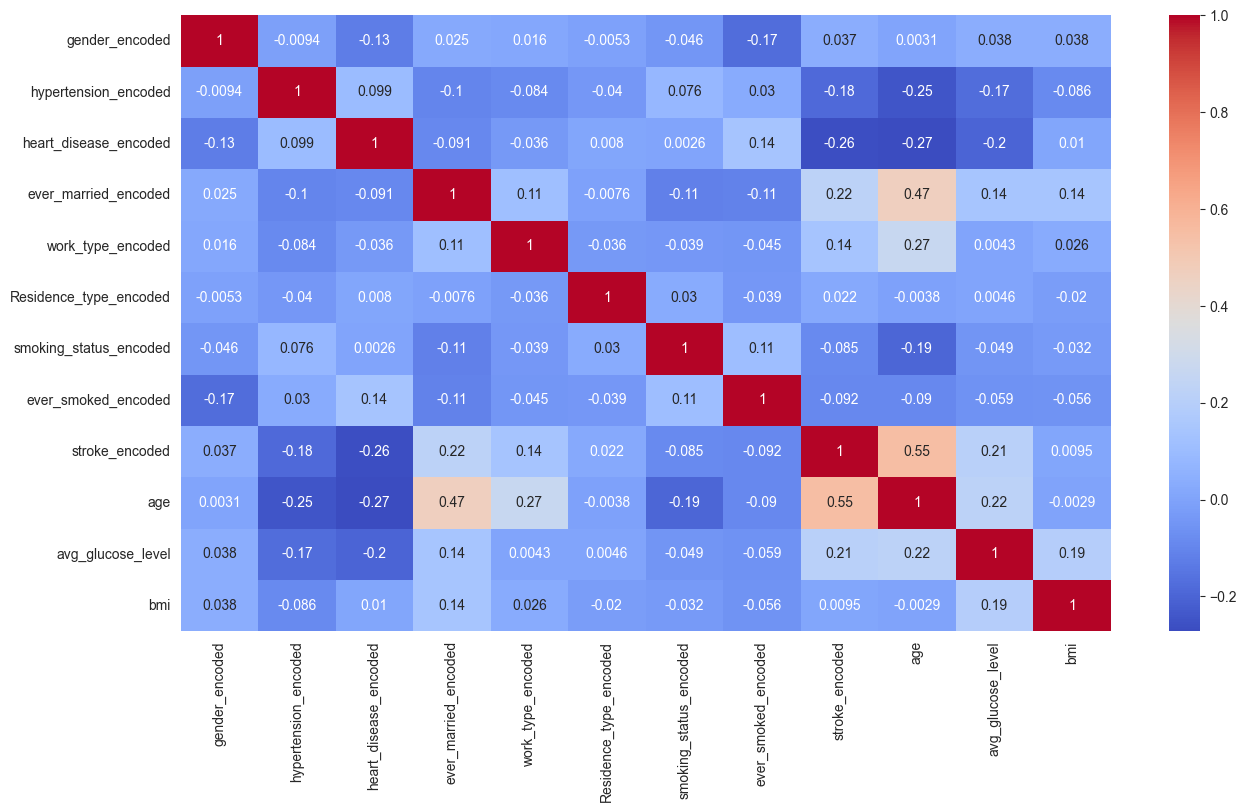

In [242]:
plt.figure(figsize = (15,8))
sns.heatmap(df_balanced.corr(), annot=True, cmap ='coolwarm')

#5.	Regression Analysis (4 marks)
##•	Application of Models (2 marks):
### 0.5 marks: Correct implementation of Logistic Regression.
### 0.5 marks: Correct implementation of DecisionTree Regression.
### 0.5 marks: Correct implementation of Naives bayes.
### 0.5 marks: Correct implementation of Otro modelo.
##Model Evaluation and Interpretation (2 marks):
### 0.5 marks: Accurate calculation of Acurracy y F1  for each model.
### 0.5 marks: Accurate calculation of recall  for each model.
### 1 mark: Interpretation and comparison of model results.


In [243]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

# Initializing the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Initializing RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Performing under-sampling on the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

# Training the model with the training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')
confusion_matrix(y_test, y_pred)

# Show additional metrics (optional)
print(classification_report(y_test, y_pred))




Accuracy del modelo: 0.71
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      8839
           1       0.06      0.81      0.11       191

    accuracy                           0.71      9030
   macro avg       0.53      0.76      0.47      9030
weighted avg       0.97      0.71      0.81      9030



In [244]:
new = pd.DataFrame(y_pred, y_test)

In [245]:
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[6263 2576]
 [  37  154]]
0.05641025641025641


Text(50.722222222222214, 0.5, 'Actual')

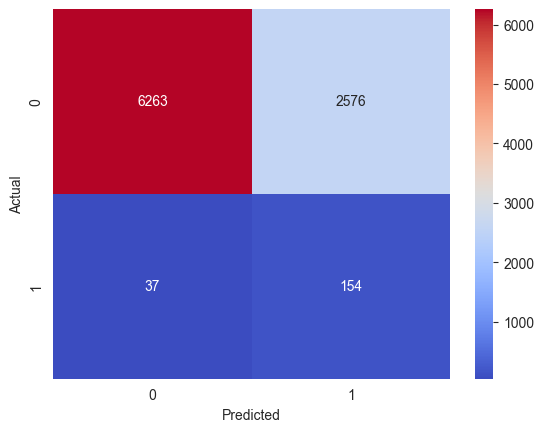

In [246]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [247]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

# Perform oversampling on the training data
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

# Train the model with the oversampled data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a DataFrame to compare actual vs predicted
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head())


Accuracy del modelo: 0.72
Confusion Matrix:
[[6369 2470]
 [  39  152]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.84      8839
           1       0.06      0.80      0.11       191

    accuracy                           0.72      9030
   macro avg       0.53      0.76      0.47      9030
weighted avg       0.97      0.72      0.82      9030

       Actual  Predicted
4372        0          0
12828       0          0
13668       0          0
426         0          0
20647       0          0


Text(50.722222222222214, 0.5, 'Actual')

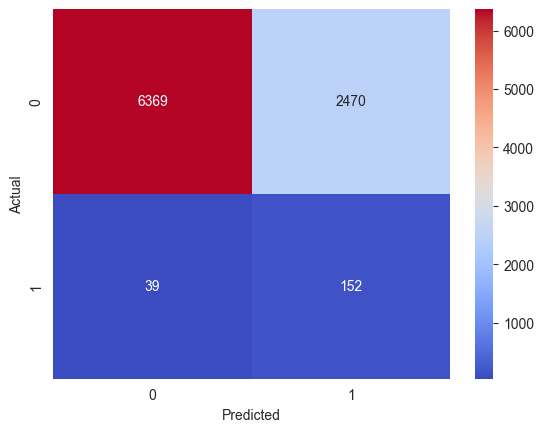

In [248]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

Para revision al rato ....  :) (Naive Bayes model)

In [249]:
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler


# Initializing the Naive Bayes model
model = GaussianNB()

# Initializing RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Performing under-sampling on the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

# Training the model with the training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

# Displaying the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Showing additional metrics
print(classification_report(y_test, y_pred))


Accuracy of the model: 0.72
[[6365 2474]
 [  38  153]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.84      8839
           1       0.06      0.80      0.11       191

    accuracy                           0.72      9030
   macro avg       0.53      0.76      0.47      9030
weighted avg       0.97      0.72      0.82      9030



Text(50.722222222222214, 0.5, 'Actual')

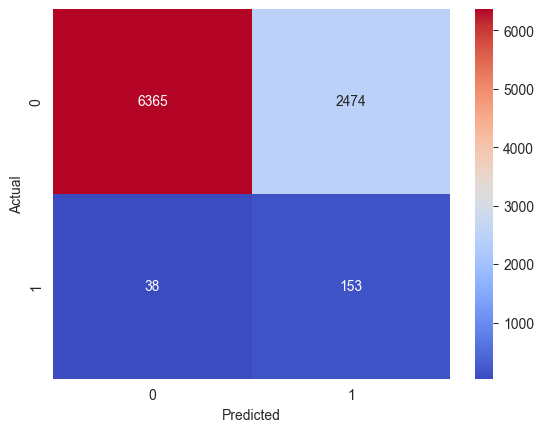

In [250]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [251]:
from imblearn.over_sampling import RandomOverSampler

# Initializing the Naive Bayes model
model = GaussianNB()

# Initialize RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

# Perform oversampling on the training data
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)


# Train the model with the oversampled data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

# Displaying the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Showing additional metrics
print(classification_report(y_test, y_pred))

Accuracy of the model: 0.73
[[6484 2355]
 [  45  146]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      8839
           1       0.06      0.76      0.11       191

    accuracy                           0.73      9030
   macro avg       0.53      0.75      0.48      9030
weighted avg       0.97      0.73      0.83      9030



Text(50.722222222222214, 0.5, 'Actual')

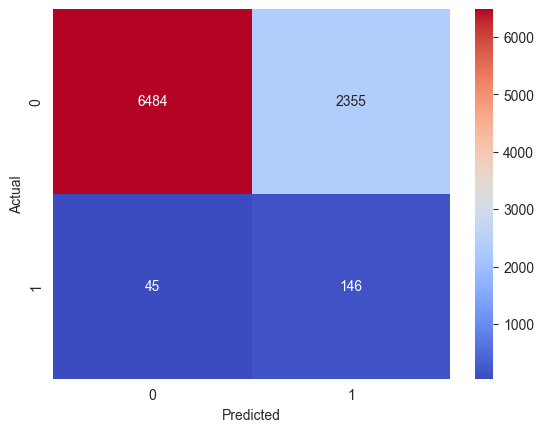

In [252]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [253]:
from sklearn.svm import SVC

# Initialize RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

# Perform oversampling on the training data
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

# Entrenar el modelo SVM
model = SVC(kernel='linear', random_state=42)

# Train the model with the oversampled data
model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.svm import SVC

# Initializing RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Performing under-sampling on the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)


# Entrenar el modelo SVM
model = SVC(kernel='linear', random_state=42)


# Training the model with the training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6910299003322259
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      8839
           1       0.05      0.84      0.10       191

    accuracy                           0.69      9030
   macro avg       0.52      0.76      0.46      9030
weighted avg       0.98      0.69      0.80      9030

[[6080 2759]
 [  31  160]]


In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Decision Tree
Functions and transversal data division for both types of decision trees





In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


# Splitting the dataset into features and target variable
X_train_resampled
y_train_resampled


# Define the parameter grid to tune the model
param_grid = {
    'max_depth': [None, 10, 13, 17, 20, 23, 27, 30],
    'min_samples_split': [2, 5, 10, 13, 17, 20],
    'min_samples_leaf': [1, 3, 5, 7, 10, 15]
}

#### Decision Tree with Gini impurity

In [ ]:
# Setting up the GridSearchCV objects, one for each criterion
grid_search_gini = GridSearchCV(
    DecisionTreeClassifier(criterion='gini', random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

# Fitting the GridSearchCV objects
grid_search_gini.fit(X_train_resampled, y_train_resampled)
y_pred = grid_search_gini.predict(X_test)

# Getting the best parameters and best scores
best_params_gini = grid_search_gini.best_params_
best_score_gini = grid_search_gini.best_score_

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

# Displaying the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Showing additional metrics
print(classification_report(y_test, y_pred))


Accuracy of the model: 0.69
[[6042 2797]
 [  35  156]]
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      8839
           1       0.05      0.82      0.10       191

    accuracy                           0.69      9030
   macro avg       0.52      0.75      0.45      9030
weighted avg       0.97      0.69      0.80      9030



#### Decision Tree with Entropy

In [ ]:
# Setting up the GridSearchCV objects, one for each criterion

grid_search_entropy = GridSearchCV(
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='recall'
)

# Fitting the GridSearchCV objects
grid_search_entropy.fit(X_train_resampled, y_train_resampled)
y_pred = grid_search_entropy.predict(X_test)

# Getting the best parameters and best scores
best_params_entropy = grid_search_entropy.best_params_
best_score_entropy = grid_search_entropy.best_score_


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

# Displaying the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Showing additional metrics
print(classification_report(y_test, y_pred))


Accuracy of the model: 0.70
[[6176 2663]
 [  49  142]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      8839
           1       0.05      0.74      0.09       191

    accuracy                           0.70      9030
   macro avg       0.52      0.72      0.46      9030
weighted avg       0.97      0.70      0.80      9030



In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Configurando el objeto GridSearchCV para el bosque aleatorio
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=2,  # Validación cruzada de 5 pliegues
    scoring='accuracy'
)

# Ajustando el objeto GridSearchCV
grid_search_rf.fit(X_train, y_train)
y_pred = grid_search_rf.predict(X_test)

# Obteniendo los mejores parámetros y los mejores puntajes
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_



# Displaying the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Showing additional metrics
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')